In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [112]:
df_AirBnp_listing = pd.read_csv('listings.csv', delimiter=',')

In [113]:
df_AirBnp_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 6.3+ MB


In [114]:
#set(df_AirBnp_listing.columns)

In [115]:
df_new = df_AirBnp_listing[['room_type', 'neighbourhood', 
                                'accommodates', 'bedrooms',
                                'bathrooms', 'price',
                                'name', 'host_since',
                                'host_response_time',
                                'host_response_rate',
                                'host_is_superhost',
                                'host_has_profile_pic',
                                'host_identity_verified',
                                'is_location_exact',
                                'property_type',
                                'minimum_minimum_nights',
                                'minimum_maximum_nights',
                                'review_scores_rating',
                                'review_scores_location',
                                'review_scores_value',
                                'cancellation_policy',
                                'reviews_per_month'
                           ]]

In [116]:
df_new.dtypes

room_type                  object
neighbourhood              object
accommodates                int64
bedrooms                  float64
bathrooms                 float64
price                      object
name                       object
host_since                 object
host_response_time         object
host_response_rate         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
is_location_exact          object
property_type              object
minimum_minimum_nights      int64
minimum_maximum_nights      int64
review_scores_rating      float64
review_scores_location    float64
review_scores_value       float64
cancellation_policy        object
reviews_per_month         float64
dtype: object

In [117]:
df_new[['room_type', 'neighbourhood', 'host_response_time', 
        'host_is_superhost', 'host_has_profile_pic', 
        'host_identity_verified', 'is_location_exact', 'property_type', 
        'cancellation_policy']].head(1)

,room_type,neighbourhood,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,cancellation_policy
0,Entire home/apt,Skarpnäck,within a few hours,f,t,f,f,House,moderate


In [118]:
cleanup_nums = {"room_type":     {"Private room":1, "Shared room":2, "Entire home/apt":3, 
                                  "Hotel room":4},
                "neighbourhood": {"Södermalm":1, "Kungsholmen":2, "Rinkeby-Kista":3, 
                                  "Farsta":4, "Norrmalm":5, "Skarpnäck":6, 
                                  "Enskede-Årsta-Vantör":7, "Hägersten-Liljeholmen":8,
                                  "Östermalm":9, "Älvsjö":10, "Skärholmen":11, 
                                  "Bromma":12, "Hässelby-Vällingby":13, "Spånga-Tensta":14, 
                                  "nan":15 },
               "host_response_time": {"within an hour":1, "a few days or more":2, 
                                      "within a few hours":3, "nan":5, "within a day":4},
                "host_is_superhost": {"t":1, "f":2, "nan":3},
                "host_has_profile_pic": {"t":1, "f":2, "nan":3},
                "host_identity_verified": {"t":1, "f":2, "nan":3},
                "is_location_exact": {"t":1, "f":2},
                "property_type": {"Apartment":1, "Bed and breakfast":2, "Townhouse":3, 
                                  "Loft":4, "Guesthouse":5, "Condominium":6, "House":7,
                                  "Serviced apartment":8,"Villa":9, "Camper/RV":10, "Boat":11,
                                  "Guest suite":12, "Hostel":13, "Earth house":14, "Hotel":15, 
                                  "Boutique hotel":16, "Nature lodge":17,
                                   "Tiny house":18, 
                                  "Cabin":19, "Treehouse":19, "Tiny house":20, 
                                  "Farm stay":21, "Aparthotel":22, "Houseboat":23, 
                                  "In-law":24, "Cottage":25, 
                                  "Other":19},
                "cancellation_policy": {"flexible":1, "strict_14_with_grace_period":2, 
                                        "moderate":3, "super_strict_60":4}
               
               
               
               }

In [119]:
df_new.replace(cleanup_nums, inplace=True)
df_new.head()

,room_type,neighbourhood,accommodates,bedrooms,bathrooms,price,name,host_since,host_response_time,host_response_rate,...,host_identity_verified,is_location_exact,property_type,minimum_minimum_nights,minimum_maximum_nights,review_scores_rating,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month
0,3,6,3,2.0,1.0,"$1,197.00","Stockholm, new spacoius villa",2011-06-26,3.0,100%,...,2,2,7,3,730,NaN,NaN,NaN,3,NaN
1,3,1,2,2.0,1.0,"$3,159.00",Hornstull with water view!,2011-06-27,NaN,NaN,...,2,1,1,4,365,94.0,9.0,9.0,3,0.22
2,1,1,2,1.0,1.0,$603.00,Double room in central Stockholm with Wi-Fi,2011-07-06,1.0,100%,...,1,1,1,3,300,97.0,10.0,10.0,1,3.12
3,2,1,2,1.0,1.0,$670.00,Doubleroom at Södermalm &trendySofo,2011-08-26,2.0,0%,...,2,1,2,3,14,98.0,10.0,10.0,1,0.80
4,3,5,2,1.0,1.0,$890.00,Central apartment perfect for two,2011-09-10,NaN,NaN,...,2,1,1,3,365,NaN,NaN,NaN,3,NaN


In [120]:
#df_new['neighbourhood'] = df_new['neighbourhood']==NaN

df_new['neighbourhood'] = df_new['neighbourhood'].fillna(0)
df_new['host_response_rate'] = df_new['host_response_rate'].fillna(0)
df_new['host_is_superhost'] = df_new['host_is_superhost'].fillna(0)
df_new['host_has_profile_pic'] = df_new['host_has_profile_pic'].fillna(0)
df_new['host_identity_verified'] = df_new['host_identity_verified'].fillna(0)
df_new['host_response_rate'] = df_new['host_response_rate'].fillna(0)
df_new['price'] = df_new.price.str.replace('$', '')
df_new['price'] = df_new.price.str.replace(',', '')#.astype(float)
df_new['price'] = df_new['price'].astype(str).astype(float)
df_new['host_response_rate'] = df_new.host_response_rate.str.replace('%', '')
df_new['host_response_rate'] = df_new['host_response_rate'].fillna(0)
df_new['host_response_rate'] = df_new['host_response_rate'].astype(str).astype(int)


#df_new['host_response_rate'] = df_new.host_response_rate.str.replace('%', '').astype(float)

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is t

In [121]:
df_new[['room_type', 'neighbourhood', 'host_response_time', 
        'host_is_superhost', 'host_has_profile_pic', 
        'host_identity_verified', 'is_location_exact', 'property_type', 
        'cancellation_policy']]

,room_type,neighbourhood,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,cancellation_policy
0,3,6,3.0,2,1,2,2,7,3
1,3,1,NaN,2,1,2,1,1,3
2,1,1,1.0,1,1,1,1,1,1
3,2,1,2.0,2,1,2,1,2,1
4,3,5,NaN,2,1,2,1,1,3
...,...,...,...,...,...,...,...,...,...
7764,1,0,3.0,2,1,1,1,1,1
7765,3,2,NaN,2,1,1,1,1,2
7766,3,2,NaN,2,1,1,1,1,2
7767,1,0,NaN,2,1,2,1,1,2


In [122]:
df_new.dtypes

room_type                   int64
neighbourhood               int64
accommodates                int64
bedrooms                  float64
bathrooms                 float64
price                     float64
name                       object
host_since                 object
host_response_time        float64
host_response_rate          int64
host_is_superhost           int64
host_has_profile_pic        int64
host_identity_verified      int64
is_location_exact           int64
property_type               int64
minimum_minimum_nights      int64
minimum_maximum_nights      int64
review_scores_rating      float64
review_scores_location    float64
review_scores_value       float64
cancellation_policy         int64
reviews_per_month         float64
dtype: object

In [123]:
df_new['review_scores_rating']

0        NaN
1       94.0
2       97.0
3       98.0
4        NaN
        ... 
7764     NaN
7765     NaN
7766     NaN
7767     NaN
7768     NaN
Name: review_scores_rating, Length: 7769, dtype: float64


#drop data that dont contain information
#df_new = df_new[df_new['bedrooms'] > 0]
#df_new = df_new[df_new['price']  > 0]
#df_new = df_new[df_new['accommodates']  > 0]
#df_new = df_new[df_new['price'] < 700]

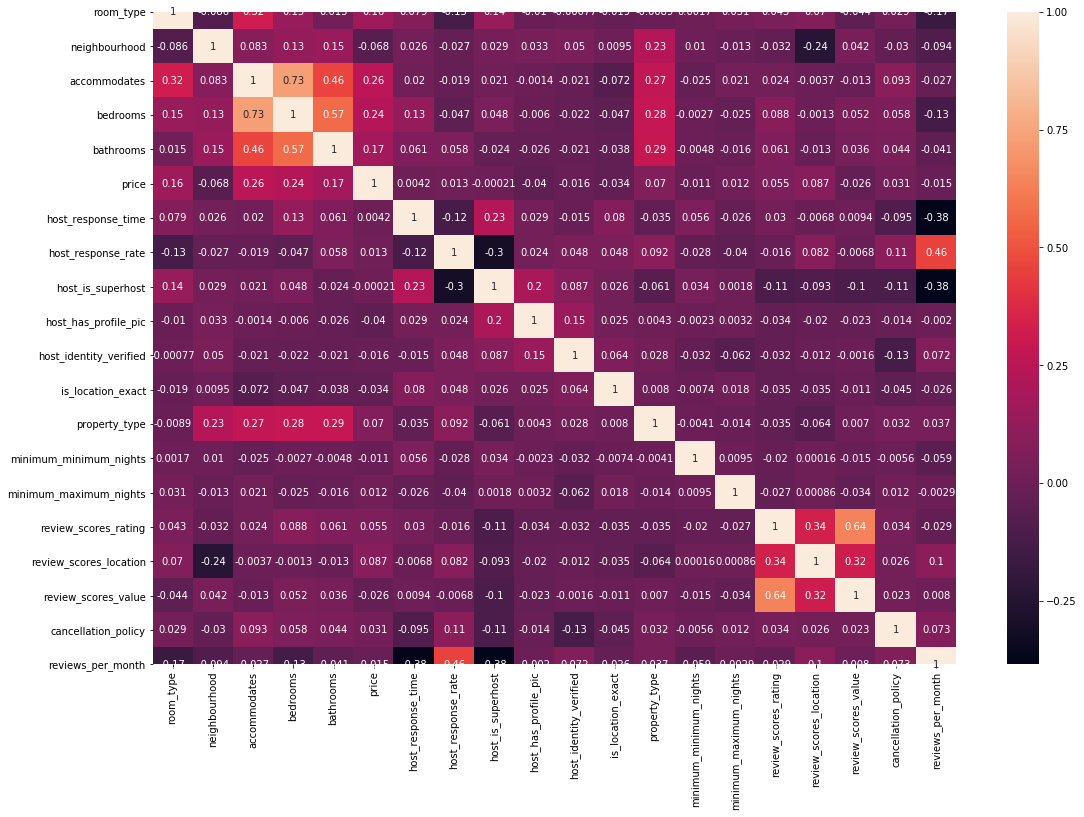

In [125]:
plt.figure(figsize=(18,12))
sns.heatmap(df_new.corr(), annot=True)

In [126]:
df_new[['room_type', 'neighbourhood', 'host_response_time', 
        'host_is_superhost', 'host_has_profile_pic', 
        'host_identity_verified', 'is_location_exact', 'property_type', 
        'cancellation_policy']].head(1)

,room_type,neighbourhood,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,cancellation_policy
0,3,6,3.0,2,1,2,2,7,3


In [128]:
pd.get_dummies(df_new['room_type'], dummy_na=True)


,1.0,2.0,3.0,4.0,NaN
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
7764,1,0,0,0,0
7765,0,0,1,0,0
7766,0,0,1,0,0
7767,1,0,0,0,0
